# CPN，LVQ神经网络

## 使用CPN实现函数逼近

F:\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


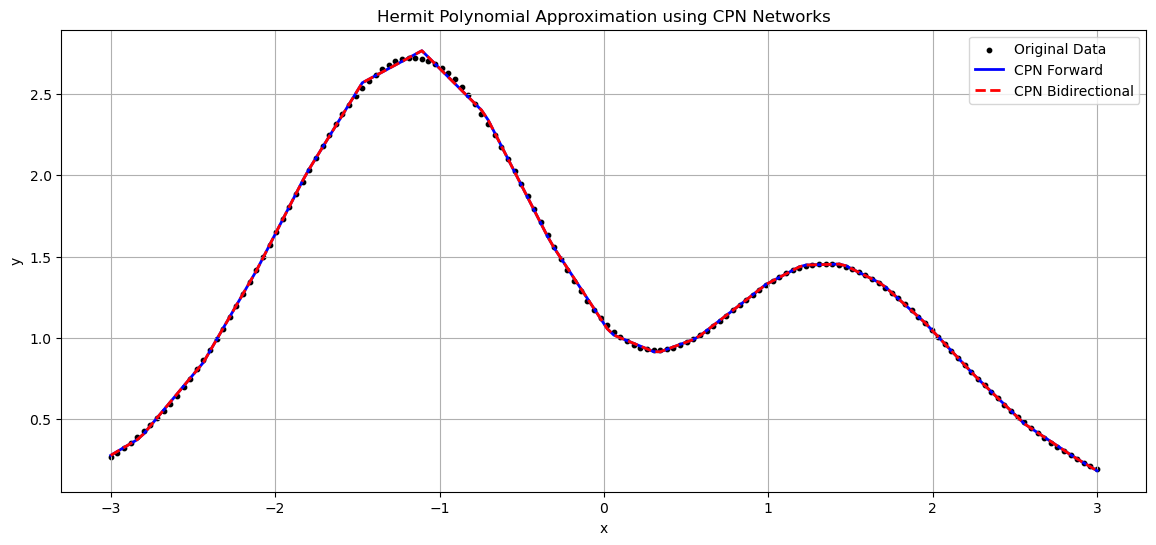

Mean Squared Error (CPN Forward): 0.0001
Mean Squared Error (CPN Bidirectional): 0.0001


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy.special import hermite

def f_hermit(x):
    return 1.1 * (1 - x + 2 * x**2) * np.exp(-x**2 / 2)
# 生成 Hermit 多项式数据
np.random.seed(42)
x_data = np.linspace(-3, 3, 150).reshape(-1, 1)
#y_data = f_hermit(x_data).ravel() + np.random.normal(0, 1, len(x_data))
y_data=f_hermit(x_data)

# CPN 单向网络 (CPN Forward)
class CPNForward:
    def __init__(self, hidden_nodes=20):
        self.hidden_nodes = hidden_nodes
        self.kmeans = KMeans(n_clusters=hidden_nodes, random_state=42)
        self.linear_model = LinearRegression()

    def train(self, x, y):
        # 竞争层：使用 KMeans 聚类
        self.kmeans.fit(x)
        rbf_features = self.kmeans.transform(x)
        # 线性层：线性回归
        self.linear_model.fit(rbf_features, y)

    def predict(self, x):
        rbf_features = self.kmeans.transform(x)
        return self.linear_model.predict(rbf_features)

# CPN 双向网络 (CPN Bidirectional)
class CPNBidirectional:
    def __init__(self, hidden_nodes=20):
        self.hidden_nodes = hidden_nodes
        self.kmeans = KMeans(n_clusters=hidden_nodes, random_state=42)
        self.linear_model_forward = LinearRegression()
        self.linear_model_backward = LinearRegression()

    def train(self, x, y):
        # 竞争层：使用 KMeans 聚类
        self.kmeans.fit(x)
        rbf_features = self.kmeans.transform(x)
        # 前向训练：线性回归
        self.linear_model_forward.fit(rbf_features, y)
        # 反向训练：线性回归
        self.linear_model_backward.fit(y.reshape(-1, 1), rbf_features)

    def predict(self, x):
        rbf_features = self.kmeans.transform(x)
        return self.linear_model_forward.predict(rbf_features)

    def reconstruct(self, y):
        return self.linear_model_backward.predict(y.reshape(-1, 1))

# 设置隐藏层节点数
hidden_nodes = 20

# 训练 CPN 单向网络
cpn_forward = CPNForward(hidden_nodes=hidden_nodes)
cpn_forward.train(x_data, y_data)
y_pred_forward = cpn_forward.predict(x_data)

# 训练 CPN 双向网络
cpn_bidirectional = CPNBidirectional(hidden_nodes=hidden_nodes)
cpn_bidirectional.train(x_data, y_data)
y_pred_bidirectional = cpn_bidirectional.predict(x_data)

# 可视化 Hermit 多项式的逼近结果
plt.figure(figsize=(14, 6))
plt.scatter(x_data, y_data, color='black', label='Original Data', s=10)
plt.plot(x_data, y_pred_forward, color='blue', linestyle='-', linewidth=2, label='CPN Forward')
plt.plot(x_data, y_pred_bidirectional, color='red', linestyle='--', linewidth=2, label='CPN Bidirectional')
plt.title('Hermit Polynomial Approximation using CPN Networks')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 计算逼近误差
mse_forward = np.mean((y_data - y_pred_forward) ** 2)
mse_bidirectional = np.mean((y_data - y_pred_bidirectional) ** 2)

print(f"Mean Squared Error (CPN Forward): {mse_forward:.4f}")
print(f"Mean Squared Error (CPN Bidirectional): {mse_bidirectional:.4f}")


# LVQ网络进行分类

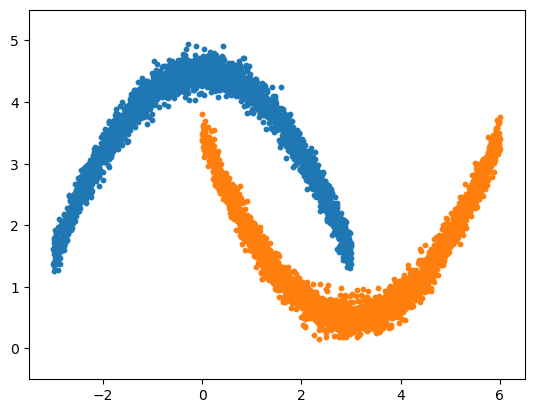

In [22]:
def gif1(datanum):
    x1 = np.linspace(-3, 3, datanum)
    noise = np.random.randn(datanum) * 0.15
    y1 = -np.square(x1) / 3 + 4.5 + noise

    x2 = np.linspace(0, 6, datanum)
    noise = np.random.randn(datanum) * 0.15
    y2 = np.square(x2 - 3) / 3 + 0.5 + noise

    plt.clf()
    plt.axis([-3.5, 6.5, -.5, 5.5])
    plt.scatter(x1, y1, s=10)
    plt.scatter(x2, y2, s=10)
    plt.draw()



gif1(3000)


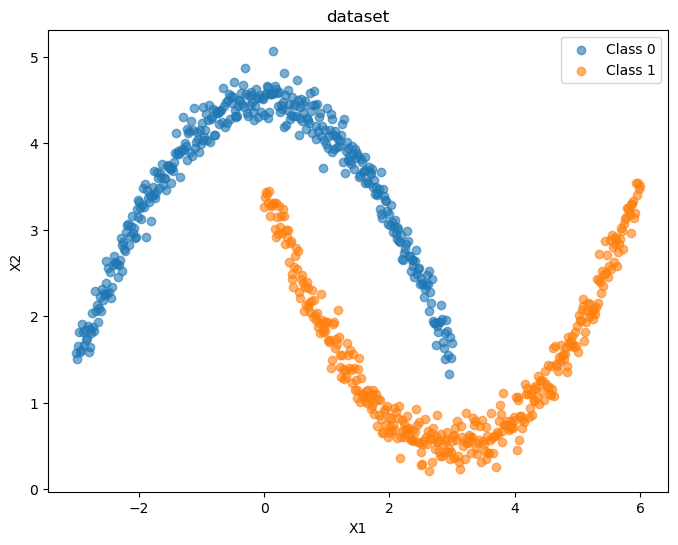

每类原型数 n=5, 使用LVQ1=False, 模型准确率: 0.96


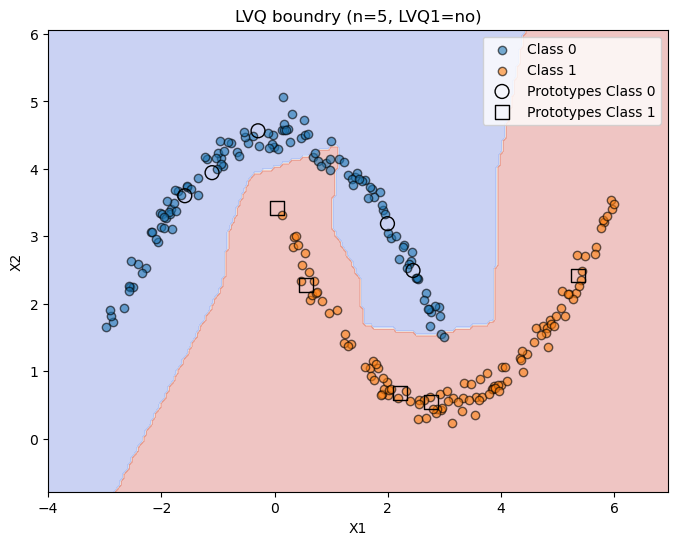

每类原型数 n=20, 使用LVQ1=False, 模型准确率: 1.00


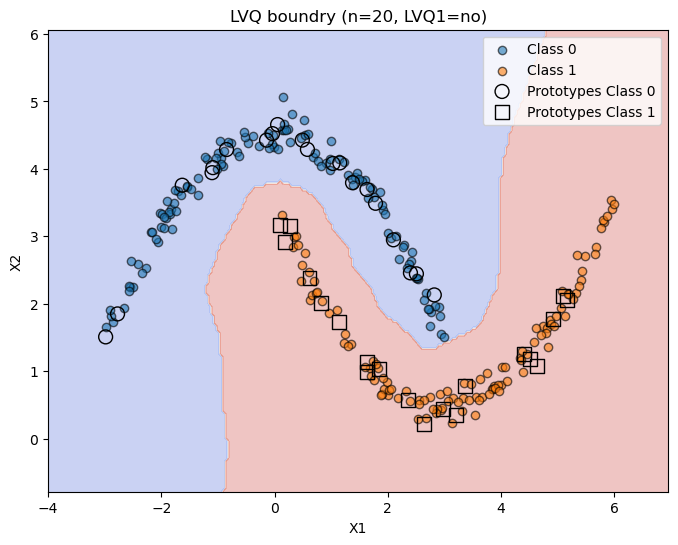


使用LVQ1算法进行训练：
每类原型数 n=5, 使用LVQ1=True, 模型准确率: 1.00


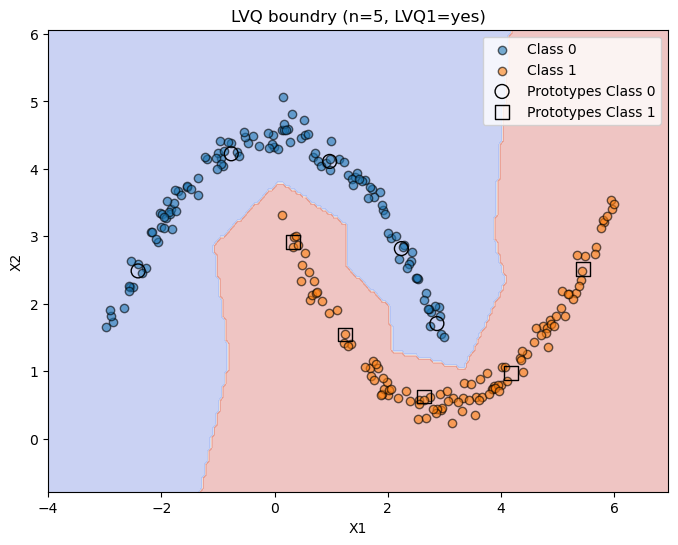

每类原型数 n=20, 使用LVQ1=True, 模型准确率: 1.00


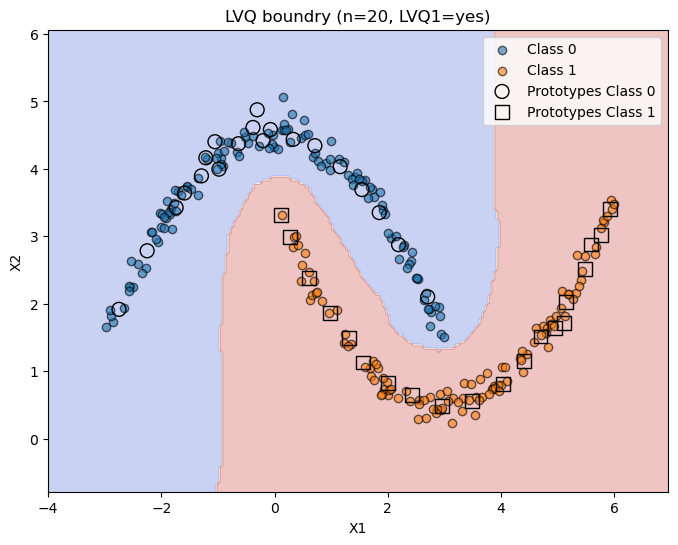

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 生成数据
# 类别0的数据
x1 = np.linspace(-3, 3, 400)
noise = np.random.randn(400) * 0.15
y1 = -np.square(x1) / 3 + 4.5 + noise

# 类别1的数据
x2 = np.linspace(0, 6, 400)
noise = np.random.randn(400) * 0.15
y2 = np.square(x2-3) / 3 + 0.5 + noise

# 合并数据
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(400), np.ones(400)))  # 类别0和类别1

# 可视化数据
plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], label='Class 0', alpha=0.6)
plt.scatter(X[y==1][:,0], X[y==1][:,1], label='Class 1', alpha=0.6)
plt.title('dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LVQ网络实现
class LVQ:
    def __init__(self, n_prototypes_per_class=5, learning_rate=0.01, n_epochs=100):
        self.n_prototypes_per_class = n_prototypes_per_class
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.prototypes = None
        self.prototype_labels = None

    def initialize_prototypes(self, X, y):
        prototypes = []
        prototype_labels = []
        classes = np.unique(y)
        for cls in classes:
            # 随机选择n_prototypes_per_class个样本作为初始原型
            idx = np.where(y == cls)[0]
            selected_idx = np.random.choice(idx, self.n_prototypes_per_class, replace=False)
            prototypes.append(X[selected_idx])
            prototype_labels += [cls] * self.n_prototypes_per_class
        self.prototypes = np.vstack(prototypes)
        self.prototype_labels = np.array(prototype_labels)

    def predict(self, X):
        # 计算每个样本到所有原型的距离
        distances = np.linalg.norm(X[:, np.newaxis] - self.prototypes, axis=2)
        # 找到最近的原型
        nearest = np.argmin(distances, axis=1)
        return self.prototype_labels[nearest]

    def fit(self, X, y, use_lvq1=False):
        self.initialize_prototypes(X, y)
        for epoch in range(self.n_epochs):
            # 随机打乱训练数据
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for xi, yi in zip(X_shuffled, y_shuffled):
                # 找到最近的原型
                distances = np.linalg.norm(xi - self.prototypes, axis=1)
                winner_idx = np.argmin(distances)
                winner_label = self.prototype_labels[winner_idx]
                if winner_label == yi:
                    # 更新原型向量靠近样本
                    if use_lvq1:
                        self.prototypes[winner_idx] += self.learning_rate * (xi - self.prototypes[winner_idx])
                else:
                    # 更新原型向量远离样本
                    if use_lvq1:
                        self.prototypes[winner_idx] -= self.learning_rate * (xi - self.prototypes[winner_idx])
            # 可选：调整学习率或添加早停机制
        return self

    def get_prototypes(self):
        return self.prototypes, self.prototype_labels

# 定义函数来训练LVQ模型并绘制决策边界
def train_and_plot_lvq(n_prototypes_per_class, use_lvq1=False):
    # 初始化LVQ模型
    lvq = LVQ(n_prototypes_per_class=n_prototypes_per_class, learning_rate=0.01, n_epochs=20)
    # 训练模型
    lvq.fit(X_train, y_train, use_lvq1=use_lvq1)
    # 预测
    y_pred = lvq.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f'每类原型数 n={n_prototypes_per_class}, 使用LVQ1={use_lvq1}, 模型准确率: {accuracy:.2f}')
    
    # 获取原型
    prototypes, prototype_labels = lvq.get_prototypes()
    
    # 绘制决策边界
    h = 0.05  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = lvq.predict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], label='Class 0', edgecolor='k', alpha=0.6)
    plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label='Class 1', edgecolor='k', alpha=0.6)
    plt.scatter(prototypes[prototype_labels==0][:,0], prototypes[prototype_labels==0][:,1],
                marker='o', edgecolor='k', facecolor='none', s=100, label='Prototypes Class 0')
    plt.scatter(prototypes[prototype_labels==1][:,0], prototypes[prototype_labels==1][:,1],
                marker='s', edgecolor='k', facecolor='none', s=100, label='Prototypes Class 1')
    plt.title(f'LVQ boundry (n={n_prototypes_per_class}, LVQ1={"yes" if use_lvq1 else "no"})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

# 训练和绘制 n=5 的结果（不使用LVQ1）
train_and_plot_lvq(n_prototypes_per_class=5, use_lvq1=False)

# 训练和绘制 n=20 的结果（不使用LVQ1）
train_and_plot_lvq(n_prototypes_per_class=20, use_lvq1=False)

# 选做：使用LVQ1算法进行训练并比较结果
print("\n使用LVQ1算法进行训练：")

# 训练和绘制 n=5 的LVQ1结果
train_and_plot_lvq(n_prototypes_per_class=5, use_lvq1=True)

# 训练和绘制 n=20 的LVQ1结果
train_and_plot_lvq(n_prototypes_per_class=20, use_lvq1=True)


### 在上述代码中，use_lvq1参数控制是否应用LVQ1算法的更新规则。LVQ1通过在每次迭代中调整最接近的原型向样本靠近或远离，来学习数据的分布。使用LVQ1算法后，模型的原型会更好地代表各类别的特征，从而可能提高分类准确率。然而，LVQ1对噪声数据较为敏感，可能导致原型受到噪声影响。 